## Introduction to Astronomy - Tutorial 1

This part if the tutorial deals with conversion of degrees to radians using `astropy`.

In [1]:
!pip install astropy
from astropy import units as u

### Example 1: Degrees to Radians conversion

In [2]:
theta_1 = 45 * u.deg
rad_1 = theta_1.to(u.rad)
print("The angle in theta is:",theta_1)
print("The angle in radians is:", rad_1)

The angle in theta is: 45.0 deg
The angle in radians is: 0.7853981633974483 rad


### Example 2: Calculating the time taken by light to travel 1 A.U of distance

In [3]:
speed_light = 3e8 * (u.m/u.s)
solar_dist = (1*u.au).to(u.m)
time_taken = solar_dist/speed_light
time_taken = time_taken.to(u.min)
print(f"Time taken by light to travel from the sun to earth: {time_taken:.2f}")

Time taken by light to travel from the sun to earth: 8.31 min


### Example 3: If a galaxy has an angular size of 10 arcsec at 400 Mpc. What is its physical size in Kpc?

In [4]:
angle = 10*(u.arcsec)
angle = angle.to(u.rad)
distance = 400*u.Mpc
# taking small angle approximation

physical_size = distance*angle
physical_size = physical_size.to(u.kpc, equivalencies=u.dimensionless_angles())
print(f"The physical size is: {physical_size}")

The physical size is: 19.392547244381444 kpc


### Example 4: SkyCoord

Use of SkyCoord to find the seperation between two celestial objects.

In [5]:
from astropy.coordinates import SkyCoord

c1 = SkyCoord('150','2.2', unit="deg")
c2 = SkyCoord('150.1', '2.25', unit="deg")
c3 = SkyCoord('149.9','2.1', unit="deg") 

In [6]:
dist_c12 = c1.separation(c2)
dist_c13 = c1.separation(c3)
dist_c23 = c2.separation(c3)

In [7]:
print("Separation between c1 and c2:", dist_c12)
print("Separation between c1 and c3:", dist_c13)
print("Separation between c2 and c3:", dist_c23)

Separation between c1 and c2: 0d06m42.24948364s
Separation between c1 and c3: 0d08m28.93768146s
Separation between c2 and c3: 0d14m59.58492134s


### Example 5: Findind the closest objects within a stipulated radius using SkyCoord

In [8]:
import numpy as np

star_cord = SkyCoord(150.0*u.deg, 2.0*u.deg)

# random galaxy catalog
np.random.seed(1234)
ra = 150 + np.random.uniform(-0.1,0.1,50)
dec = 2 + np.random.uniform(-0.1,0.1, 50)
catalog = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)

In [9]:
separation = star_cord.separation(catalog)
mask = separation < 2*u.arcmin
close_objects = catalog[mask]
print(f"Number of stars within 2 arcmin: {len(close_objects)}")

Number of stars within 2 arcmin: 10


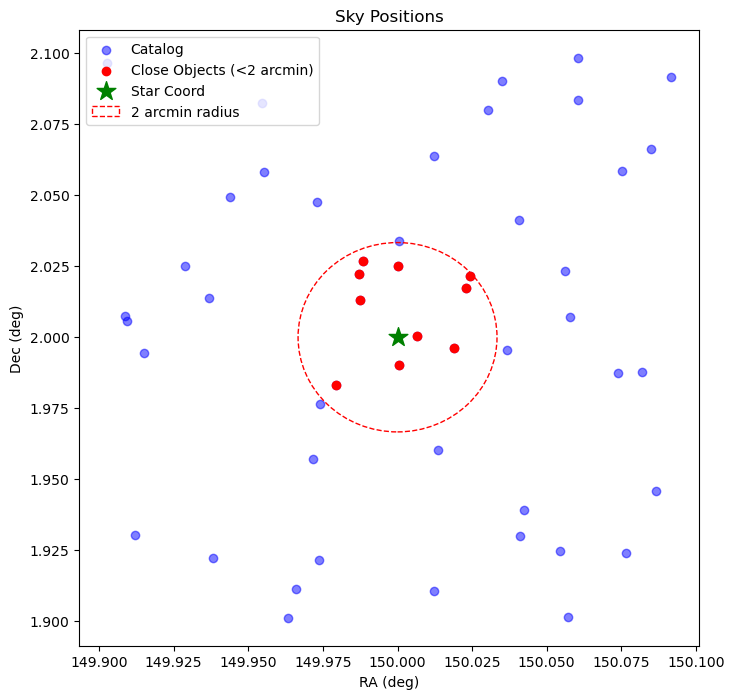

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

plt.figure(figsize=(8, 8))
plt.scatter(catalog.ra.deg, catalog.dec.deg, label='Catalog', color='blue', alpha=0.5)
plt.scatter(close_objects.ra.deg, close_objects.dec.deg, label='Close Objects (<2 arcmin)', color='red')
plt.scatter(star_cord.ra.deg, star_cord.dec.deg, label='Star Coord', color='green', marker='*', s=200)

# Convert 2 arcmin to degrees
radius_deg = (2 * u.arcmin).to(u.deg).value
circle = Circle((star_cord.ra.deg, star_cord.dec.deg), radius_deg, color='red', fill=False, linestyle='--', label='2 arcmin radius')
plt.gca().add_patch(circle)

plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.legend()
plt.title('Sky Positions')
plt.show()